# plot IC artifacts and perprocessing result

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mne
import mne_bids
from mne_bids import BIDSPath
import os
from os.path import join as pjoin


In [2]:
chn = ['MLF12-4503', 'MLF13-4503', 'MLF14-4503', 'MLF21-4503', 'MLF22-4503']

In [12]:
#%% reading ICA
bids_root = '/nfs/e5/studyforrest/forrest_movie_meg/gump_meg_bids/derivatives/preproc_meg-mne_mri-fmriprep'
data_pth = '/nfs/e5/studyforrest/forrest_movie_meg/gump_meg_bids'
sub_idx = '04'
run_idx = '04'
ica_fname = pjoin(bids_root,f'sub-{sub_idx}','ses-movie','meg',f'sub-{sub_idx}_ses-movie_task-movie_run-{run_idx}_ica.fif.gz')
data_fname = pjoin(data_pth, f'sub-{sub_idx}','ses-movie','meg',f'sub-{sub_idx}_ses-movie_task-movie_run-{run_idx}_meg.ds')
preproc_pth = BIDSPath(subject=sub_idx, run=int(run_idx), task='movie', session='movie', root=bids_root)

ica = mne.preprocessing.read_ica(ica_fname)
ica.exclude=[0,1,12]
raw = mne.io.read_raw_ctf(data_fname).copy()
raw_preproc = mne_bids.read_raw_bids(preproc_pth).copy()

raw.set_annotations(None)
raw_preproc.set_annotations(None)
filter_raw = raw.copy()
filter_raw.load_data().filter(l_freq=1, h_freq=None)    

raw_pick = raw.pick(chn)
raw_preproc_pick = raw_preproc.pick(chn)

Reading /nfs/e5/studyforrest/forrest_movie_meg/gump_meg_bids/derivatives/preproc_meg-mne_mri-fmriprep/sub-04/ses-movie/meg/sub-04_ses-movie_task-movie_run-04_ica.fif.gz ...
Now restoring ICA solution ...
Ready.
ds directory : /nfs/e5/studyforrest/forrest_movie_meg/gump_meg_bids/sub-04/ses-movie/meg/sub-04_ses-movie_task-movie_run-04_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
       3.49   77.66    0.00 mm <->    3.49   77.66    0.00 mm (orig :  -56.78   52.96 -241.02 mm) diff =    0.000 mm
      -3.49  -77.66    0.00 mm <->   -3.49  -77.66    0.00 mm (orig :   49.00  -60.97 -242.71 mm) diff =    0.000 mm
      78.85    0.00    0.00 mm <->   78.85    0.00    0.00 mm (orig :   49.86   50.45 -222.79 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding

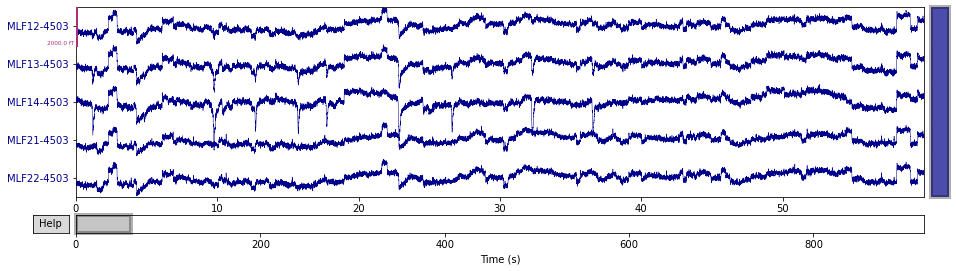

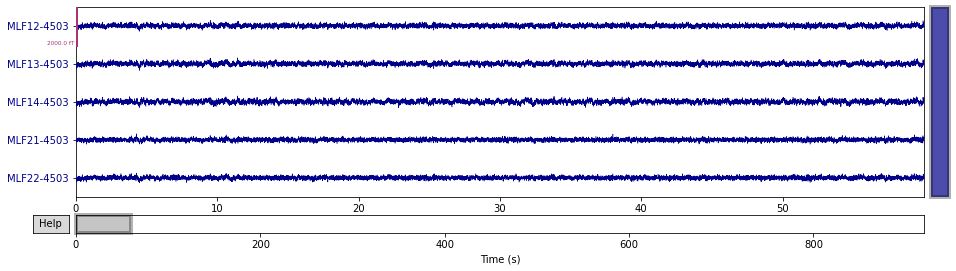

In [4]:
fig1=raw_pick.plot(duration=60)
fig2=raw_preproc_pick.plot(duration=60)

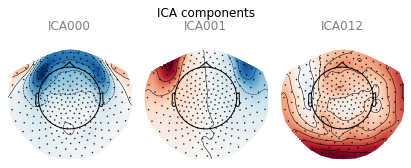

Creating RawArray with float64 data, n_channels=3, n_times=552000
    Range : 0 ... 551999 =      0.000 ...   919.998 secs
Ready.


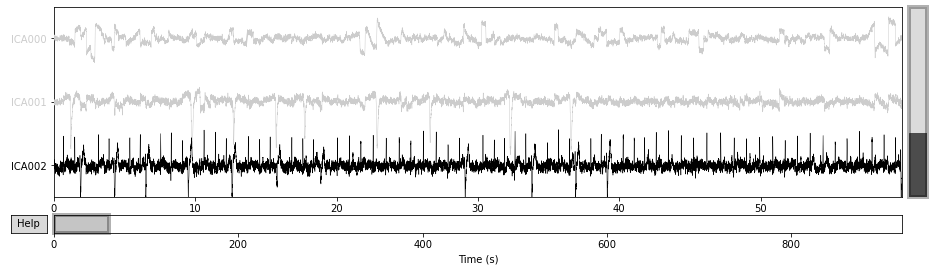

In [13]:
ica.plot_components(picks=[0,1,12])
fig=ica.plot_sources(filter_raw, picks=[0,1,12], stop=60)